### Build a machine learning model to predict whether the shipment will arrive on time or not. ( column ‘Reached.on.Time_Y.N’ from the attached data needs to be predicted )
 
You can consider that shipment which would arrive late is a higher risk for business. So, predicting potentially delayed shipments would be a big win so that business can take necessary steps to mitigate the issues.

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import scipy.stats as stats
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,classification_report
from sklearn.model_selection import GridSearchCV, StratifiedKFold
import category_encoders as ce
from collections import Counter
import warnings
warnings.filterwarnings("ignore")

In [64]:
data = pd.read_csv('data.csv')
data.head(5)

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
0,1,D,Flight,4,2,177.0,3,low,F,44,1233.0,1
1,2,F,Flight,4,5,216.0,2,low,M,59,3088.0,1
2,3,A,Flight,2,2,183.0,4,low,M,48,3374.0,1
3,4,B,Flight,3,3,176.0,4,medium,M,10,1177.0,1
4,5,C,Flight,2,2,184.0,3,medium,F,46,2484.0,1


In [65]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10999 entries, 0 to 10998
Data columns (total 12 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   10999 non-null  int64  
 1   Warehouse_block      10999 non-null  object 
 2   Mode_of_Shipment     10999 non-null  object 
 3   Customer_care_calls  10999 non-null  int64  
 4   Customer_rating      10999 non-null  int64  
 5   Cost_of_the_Product  10901 non-null  float64
 6   Prior_purchases      10999 non-null  int64  
 7   Product_importance   10845 non-null  object 
 8   Gender               10999 non-null  object 
 9   Discount_offered     10999 non-null  int64  
 10  Weight_in_gms        10860 non-null  float64
 11  Reached.on.Time_Y.N  10999 non-null  int64  
dtypes: float64(2), int64(6), object(4)
memory usage: 1.0+ MB


In [66]:
data.describe(include='all')

,ID,Warehouse_block,Mode_of_Shipment,Customer_care_calls,Customer_rating,Cost_of_the_Product,Prior_purchases,Product_importance,Gender,Discount_offered,Weight_in_gms,Reached.on.Time_Y.N
count,10999.00000,10999,10999,10999.000000,10999.000000,10901.000000,10999.000000,10845,10999,10999.000000,10860.000000,10999.000000
unique,NaN,5,3,NaN,NaN,NaN,NaN,3,2,NaN,NaN,NaN
top,NaN,F,Ship,NaN,NaN,NaN,NaN,low,F,NaN,NaN,NaN
freq,NaN,3666,7462,NaN,NaN,NaN,NaN,5217,5545,NaN,NaN,NaN
mean,5500.00000,NaN,NaN,4.054459,2.990545,210.194386,3.567597,NaN,NaN,13.373216,3641.667035,0.596691
std,3175.28214,NaN,NaN,1.141490,1.413603,48.063598,1.522860,NaN,NaN,16.205527,1635.078989,0.490584
min,1.00000,NaN,NaN,2.000000,1.000000,96.000000,2.000000,NaN,NaN,1.000000,1001.000000,0.000000
25%,2750.50000,NaN,NaN,3.000000,2.000000,169.000000,3.000000,NaN,NaN,4.000000,1843.500000,0.000000
50%,5500.00000,NaN,NaN,4.000000,3.000000,214.000000,3.000000,NaN,NaN,7.000000,4157.500000,1.000000
75%,8249.50000,NaN,NaN,5.000000,4.000000,251.000000,4.000000,NaN,NaN,10.000000,5058.250000,1.000000


In [67]:
print(data.isnull().sum())
print(data.isnull().sum()*100/len(data))

ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product     98
Prior_purchases          0
Product_importance     154
Gender                   0
Discount_offered         0
Weight_in_gms          139
Reached.on.Time_Y.N      0
dtype: int64
ID                     0.000000
Warehouse_block        0.000000
Mode_of_Shipment       0.000000
Customer_care_calls    0.000000
Customer_rating        0.000000
Cost_of_the_Product    0.890990
Prior_purchases        0.000000
Product_importance     1.400127
Gender                 0.000000
Discount_offered       0.000000
Weight_in_gms          1.263751
Reached.on.Time_Y.N    0.000000
dtype: float64


We have missing data in range of 0.8 % to 1.4 % So we will not remove it from dataset. We'll impute the missing data.

In [69]:
data.map(np.isreal).all()

ID                      True
Warehouse_block        False
Mode_of_Shipment       False
Customer_care_calls     True
Customer_rating         True
Cost_of_the_Product     True
Prior_purchases         True
Product_importance     False
Gender                 False
Discount_offered        True
Weight_in_gms           True
Reached.on.Time_Y.N     True
dtype: bool

#### Missing values with type
1. Cost_of_the_Product : Numerical
2. Product_importance  : Categorical
3. Weight_in_gms       : Numerical

[Text(0.5, 0, 'Cost_of_the_Product')]

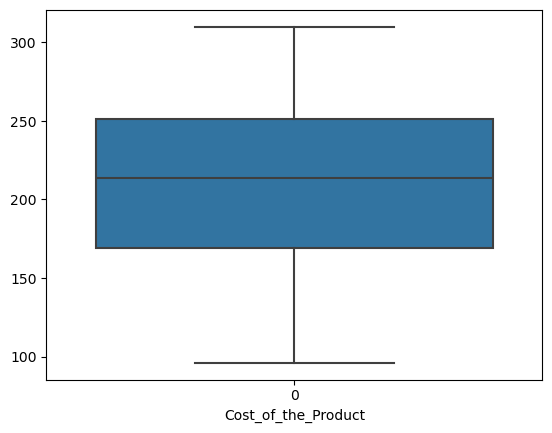

In [70]:
sns.boxplot(data['Cost_of_the_Product']).set(xlabel= 'Cost_of_the_Product')

[Text(0.5, 0, 'Weight_in_gms')]

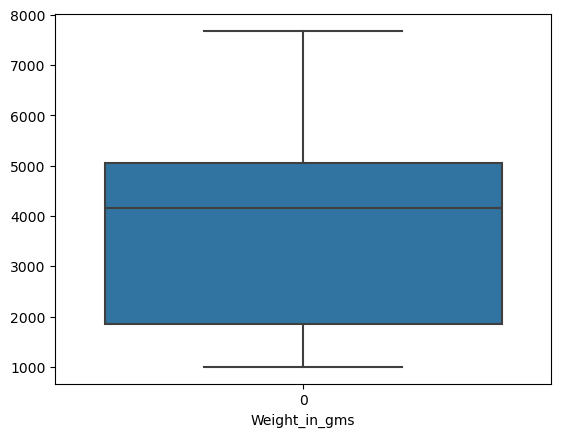

In [71]:
sns.boxplot(data['Weight_in_gms']).set(xlabel= 'Weight_in_gms')

No outliers in numerical variable which contains missing data.

In [72]:
print("mean Cost_of_the_Product before imputation: ", data['Cost_of_the_Product'].mean())
data['Cost_of_the_Product'].fillna(data['Cost_of_the_Product'].median(),inplace=True)
print("mean Cost_of_the_Product after imputation: ", data['Cost_of_the_Product'].mean())
print(data.isnull().sum())

mean Cost_of_the_Product before imputation:  210.1943858361618
mean Cost_of_the_Product after imputation:  210.22829348122556
ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product      0
Prior_purchases          0
Product_importance     154
Gender                   0
Discount_offered         0
Weight_in_gms          139
Reached.on.Time_Y.N      0
dtype: int64


In [73]:
print("mean Weight_in_gms before imputation: ", data['Weight_in_gms'].mean())
data['Weight_in_gms'].fillna(data['Weight_in_gms'].median(),inplace=True)
print("mean Weight_in_gms after imputation: ", data['Weight_in_gms'].mean())
print(data.isnull().sum())

mean Weight_in_gms before imputation:  3641.6670349907918
mean Weight_in_gms after imputation:  3648.185880534594
ID                       0
Warehouse_block          0
Mode_of_Shipment         0
Customer_care_calls      0
Customer_rating          0
Cost_of_the_Product      0
Prior_purchases          0
Product_importance     154
Gender                   0
Discount_offered         0
Weight_in_gms            0
Reached.on.Time_Y.N      0
dtype: int64


<Axes: xlabel='Weight_in_gms'>

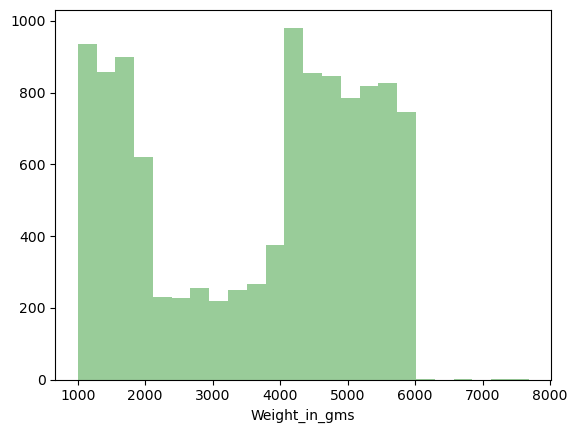

In [74]:
sns.distplot(data['Weight_in_gms'], hist = True, kde = False,color ="green")

<Axes: xlabel='Cost_of_the_Product'>

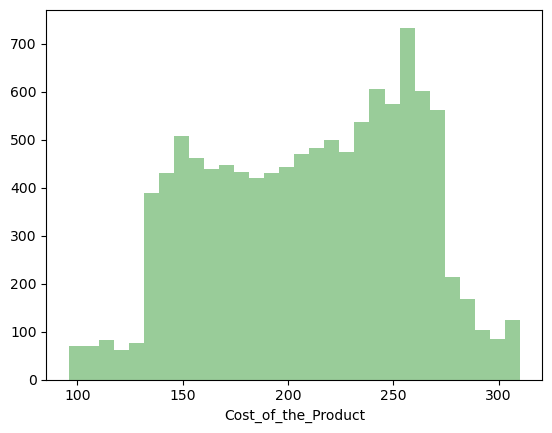

In [75]:
sns.distplot(data['Cost_of_the_Product'], hist = True, kde = False,color ="green")

In [76]:
data['Product_importance'].value_counts()

Product_importance
low       5217
medium    4698
high       930
Name: count, dtype: int64

In [77]:
data['Product_importance'].fillna('low',inplace=True)

In [78]:
data['Product_importance'].value_counts()

Product_importance
low       5371
medium    4698
high       930
Name: count, dtype: int64

In [79]:
print(data.isnull().sum())

ID                     0
Warehouse_block        0
Mode_of_Shipment       0
Customer_care_calls    0
Customer_rating        0
Cost_of_the_Product    0
Prior_purchases        0
Product_importance     0
Gender                 0
Discount_offered       0
Weight_in_gms          0
Reached.on.Time_Y.N    0
dtype: int64


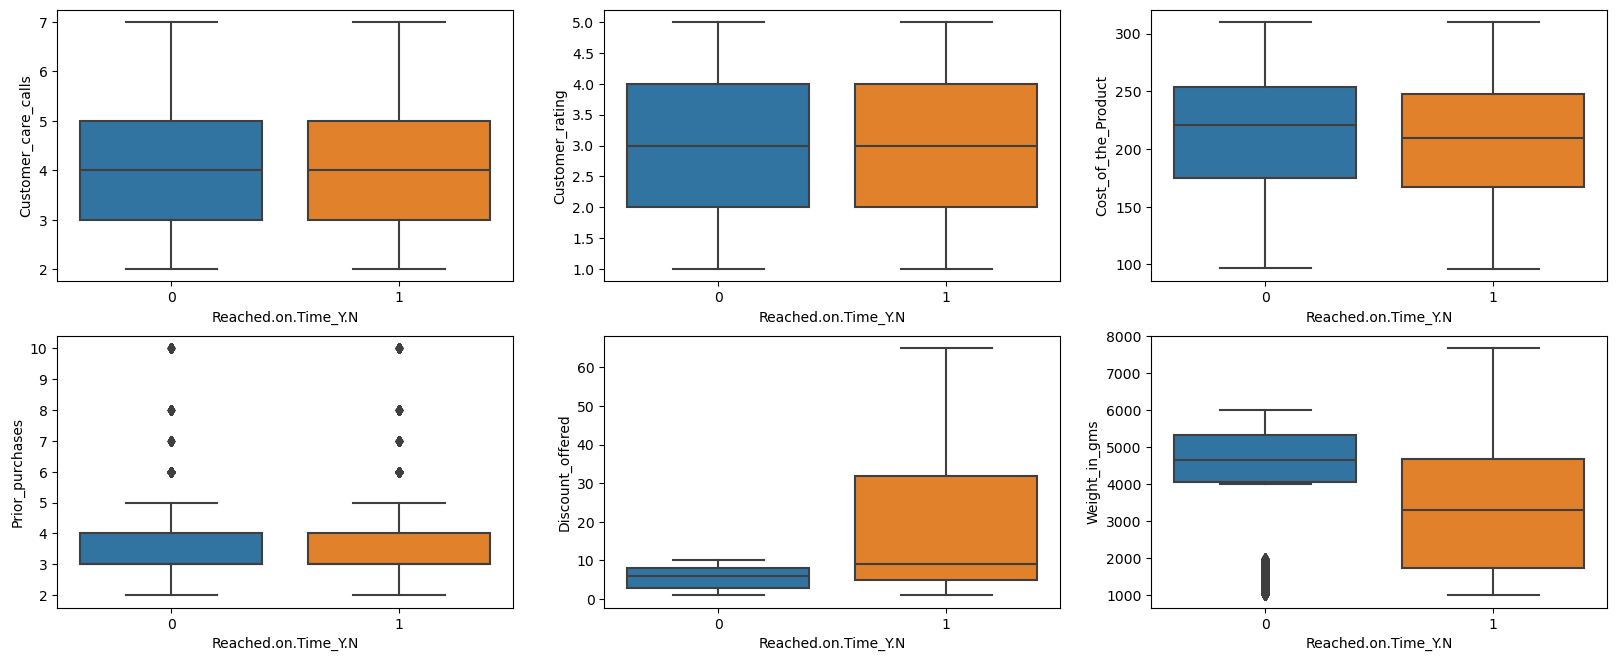

In [80]:
#Visualizing numerical variables
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'Reached.on.Time_Y.N', y = 'Customer_care_calls', data = data)
plt.subplot(3,3,2)
sns.boxplot(x = 'Reached.on.Time_Y.N', y = 'Customer_rating', data = data)
plt.subplot(3,3,3)
sns.boxplot(x = 'Reached.on.Time_Y.N', y = 'Cost_of_the_Product', data = data)
plt.subplot(3,3,4)
sns.boxplot(x = 'Reached.on.Time_Y.N', y = 'Prior_purchases', data = data)
plt.subplot(3,3,5)
sns.boxplot(x = 'Reached.on.Time_Y.N', y = 'Discount_offered', data = data)
plt.subplot(3,3,6)
sns.boxplot(x = 'Reached.on.Time_Y.N', y = 'Weight_in_gms', data = data)
plt.show()

In [81]:
data=data.drop(['ID'],axis=1)

In [82]:
data.columns

Index(['Warehouse_block', 'Mode_of_Shipment', 'Customer_care_calls',
       'Customer_rating', 'Cost_of_the_Product', 'Prior_purchases',
       'Product_importance', 'Gender', 'Discount_offered', 'Weight_in_gms',
       'Reached.on.Time_Y.N'],
      dtype='object')

AttributeError: 'numpy.int64' object has no attribute 'startswith'

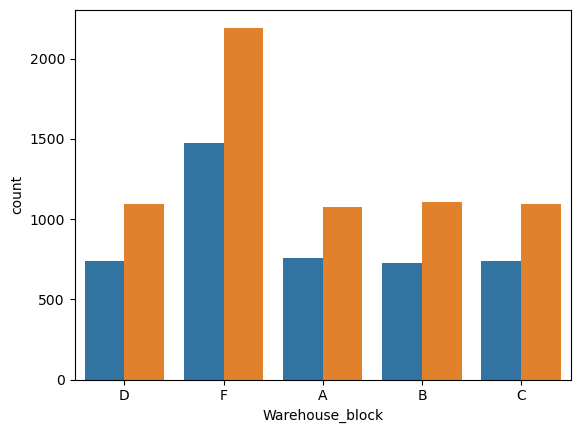

In [83]:
#Categorical Features visualization
# plt.figure(figsize=(20, 12))
sns.countplot(x ='Warehouse_block', hue = 'Reached.on.Time_Y.N', data = data)
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

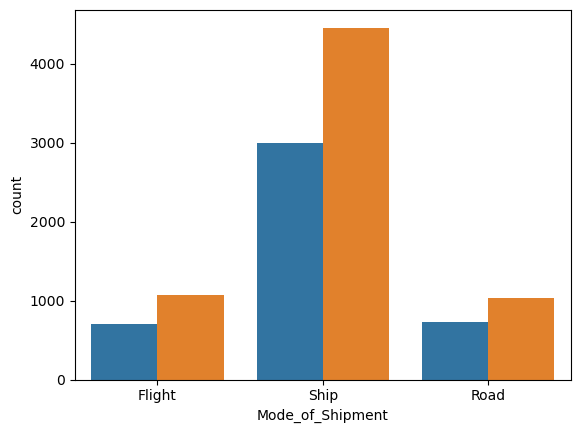

In [84]:
sns.countplot(x ='Mode_of_Shipment', hue = 'Reached.on.Time_Y.N', data = data)
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

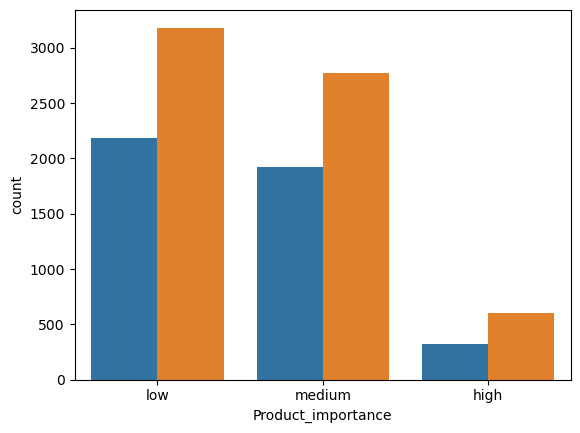

In [85]:
sns.countplot(x ='Product_importance', hue = 'Reached.on.Time_Y.N', data = data)
plt.show()

AttributeError: 'numpy.int64' object has no attribute 'startswith'

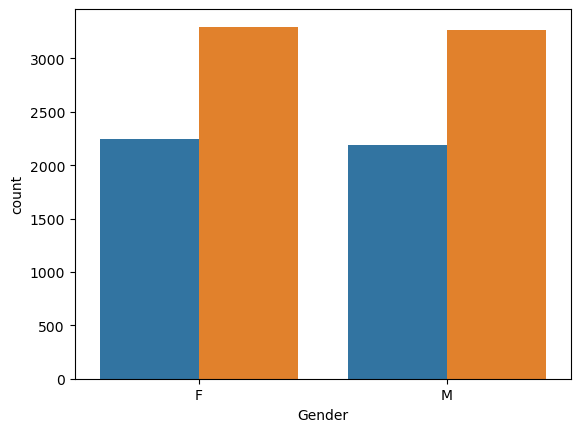

In [86]:
sns.countplot(x ='Gender', hue = 'Reached.on.Time_Y.N', data = data)
plt.show()

In [87]:
from scipy.stats import chi2_contingency
  
# defining the table
for column in data.columns:
    if(column!='Reached.on.Time_Y.N'):
        table = pd.crosstab(data[column], data['Reached.on.Time_Y.N'])
        print(table)
        stat, p, dof, expected = chi2_contingency(table)
        print("Chi-square test for feature: ", column
             )
        print("p-value : ", p)
        print("")
        print("")

Reached.on.Time_Y.N     0     1
Warehouse_block                
A                     758  1075
B                     729  1104
C                     739  1094
D                     738  1096
F                    1472  2194
Chi-square test for feature:  Warehouse_block
p-value :  0.8959524278243698


Reached.on.Time_Y.N     0     1
Mode_of_Shipment               
Flight                708  1069
Road                  725  1035
Ship                 3003  4459
Chi-square test for feature:  Mode_of_Shipment
p-value :  0.6895487627593786


Reached.on.Time_Y.N     0     1
Customer_care_calls            
2                     222   416
3                    1206  2011
4                    1431  2126
5                     968  1360
6                     490   523
7                     119   127
Chi-square test for feature:  Customer_care_calls
p-value :  1.8411500205173969e-10


Reached.on.Time_Y.N    0     1
Customer_rating               
1                    922  1313
2                    892

In [88]:
data['Reached.on.Time_Y.N'].value_counts()

Reached.on.Time_Y.N
1    6563
0    4436
Name: count, dtype: int64

In [89]:
def train_test_split_and_scale(data):
    y = data["Reached.on.Time_Y.N"]
    x = data.drop('Reached.on.Time_Y.N',axis=1)
    x = pd.get_dummies(x)
    features = list(x.columns)
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.20, random_state = 0)
    scaler = MinMaxScaler()
    x_train = scaler.fit_transform(x_train)
    x_test = scaler.transform(x_test)
    return x_train, x_test, y_train, y_test,features

In [90]:
x_train, x_test, y_train, y_test,features = train_test_split_and_scale(data)

In [91]:
Counter(y_train)

Counter({1: 5271, 0: 3528})

In [92]:
def fit_and_evaluate_model(x_train, x_test, y_train, y_test,class_weight=None):
    lr = LogisticRegression(class_weight=class_weight)
    model = lr.fit(x_train, y_train) # model training
    lr_predict = lr.predict(x_test) # create predicted o/p 0/1
    lr_conf_matrix = confusion_matrix(y_test, lr_predict)
    lr_acc_score = accuracy_score(y_test, lr_predict)
    print("confussion matrix")
    print(lr_conf_matrix)
    print("\n")
    print("Accuracy of Logistic Regression:",lr_acc_score*100,'\n')
    print(classification_report(y_test,lr_predict))
    return model

In [93]:
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test)
print("odds ratio", np.exp(model.coef_))

confussion matrix
[[521 387]
 [418 874]]


Accuracy of Logistic Regression: 63.40909090909091 

              precision    recall  f1-score   support

           0       0.55      0.57      0.56       908
           1       0.69      0.68      0.68      1292

    accuracy                           0.63      2200
   macro avg       0.62      0.63      0.62      2200
weighted avg       0.64      0.63      0.63      2200

odds ratio [[5.41323188e-01 1.09989287e+00 6.87176077e-01 5.57734672e-01
  7.26097582e+02 2.04479631e-01 9.62514774e-01 1.03919524e+00
  9.90974060e-01 9.90237559e-01 1.01634950e+00 1.01917684e+00
  9.76440529e-01 1.00242981e+00 1.24880387e+00 8.76568894e-01
  9.11316059e-01 9.76803340e-01 1.02127377e+00]]


In [95]:
weight = {0:1, 1:2}
model = fit_and_evaluate_model(x_train, x_test, y_train, y_test,class_weight=weight)

confussion matrix
[[  45  863]
 [  41 1251]]


Accuracy of Logistic Regression: 58.909090909090914 

              precision    recall  f1-score   support

           0       0.52      0.05      0.09       908
           1       0.59      0.97      0.73      1292

    accuracy                           0.59      2200
   macro avg       0.56      0.51      0.41      2200
weighted avg       0.56      0.59      0.47      2200

